In [53]:
import pandas as pd
import simpy
import statistics as st
import matplotlib.pyplot as plt
import math as m

In [54]:
base_dados = pd.read_csv("DoaçãoRim.csv", sep=",")

## Mantendo apenas os dados que serão utilizados 

In [55]:
base_dados = base_dados.drop(columns=["age_cat","time_on_Dialysis","prior_transplant","date_acutal","Time_death","Transplant_Y_N","X36MthsTx","Time_Tx","event","razon_removed"])

base_dados.head()

,date,age_at_list_registration,number_prior_transplant,patient_still_on_list,death,Transplant,removed_list,time
0,29/06/2017,67,0,Sim,Não,Não,Não,392
1,03/11/2008,58,0,Não,Sim,Óbito Lista,Não,2066
2,13/07/2010,51,0,Não,Não,Não,Sim,365
3,03/10/2011,52,1,Não,Não,Não,Sim,365
4,05/07/2006,67,0,Não,Sim,Óbito Lista,Não,194


In [56]:
# Adiciona um id para cada paciente
base_dados['Id'] = base_dados.reset_index().rename(columns={'index': 'ID'})['ID']
base_dados.head()

,date,age_at_list_registration,number_prior_transplant,patient_still_on_list,death,Transplant,removed_list,time,Id
0,29/06/2017,67,0,Sim,Não,Não,Não,392,0
1,03/11/2008,58,0,Não,Sim,Óbito Lista,Não,2066,1
2,13/07/2010,51,0,Não,Não,Não,Sim,365,2
3,03/10/2011,52,1,Não,Não,Não,Sim,365,3
4,05/07/2006,67,0,Não,Sim,Óbito Lista,Não,194,4


# Ordenando base de dados em linha do tempo crescente com recorte temporal de 2000 até 2003

In [57]:
base_dados['date'] = pd.to_datetime(base_dados['date'], dayfirst=True)
base_dados = base_dados.sort_values('date')
base_dados['final_date'] = base_dados['date'] + pd.to_timedelta(base_dados['time'], unit='D')
dados_filtrados = base_dados[(base_dados['date'].dt.year >= 2000) & (base_dados['date'].dt.year <= 2003)]
display(dados_filtrados)

,date,age_at_list_registration,number_prior_transplant,patient_still_on_list,death,Transplant,removed_list,time,Id,final_date
19779,2000-01-03,52,0,Não,Não,Sim,Não,1479,19779,2004-01-21
1333,2000-01-04,51,1,Não,Não,Não,Sim,1833,1333,2005-01-10
15146,2000-01-04,44,0,Não,Sim,Óbito Lista,Não,775,15146,2002-02-17
24674,2000-01-05,53,0,Não,Sim,Óbito Lista,Não,1888,24674,2005-03-07
7886,2000-01-06,55,0,Não,Sim,Óbito Lista,Não,6434,7886,2017-08-18
...,...,...,...,...,...,...,...,...,...,...
23615,2003-12-31,62,0,Não,Sim,Óbito Lista,Não,1771,23615,2008-11-05
43137,2003-12-31,45,0,Não,Sim,Sim,Não,1628,43137,2008-06-15
46436,2003-12-31,35,0,Não,Sim,Óbito Lista,Não,3826,46436,2014-06-22
7873,2003-12-31,47,0,Não,Sim,Óbito Lista,Não,2308,7873,2010-04-26


### Tratamento de dados removendo outliers

/tmp/ipykernel_96771/3503513871.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados['time'] = dados_filtrados['time'].clip(lower=piso, upper=teto)


1714.3144708914494


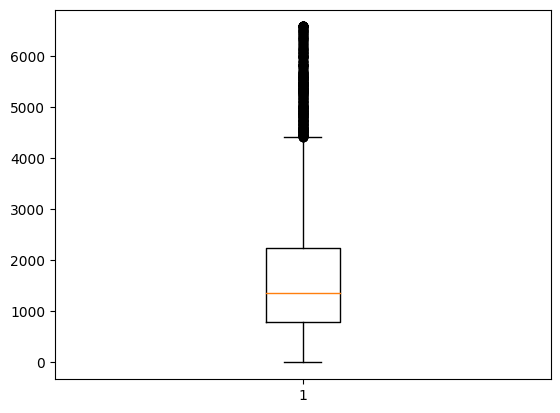

In [58]:
time_in_days = dados_filtrados['time']

a = st.quantiles(time_in_days)[2]-st.quantiles(time_in_days)[0]
piso = st.quantiles(time_in_days)[0] - 3*a
teto = st.quantiles(time_in_days)[2] + 3*a
dados_filtrados['time'] = dados_filtrados['time'].clip(lower=piso, upper=teto)

plt.boxplot(dados_filtrados['time']);
print(st.mean(dados_filtrados['time']))


### Histograma

13.603626135009186
14
470.375


<function matplotlib.pyplot.show(close=None, block=None)>

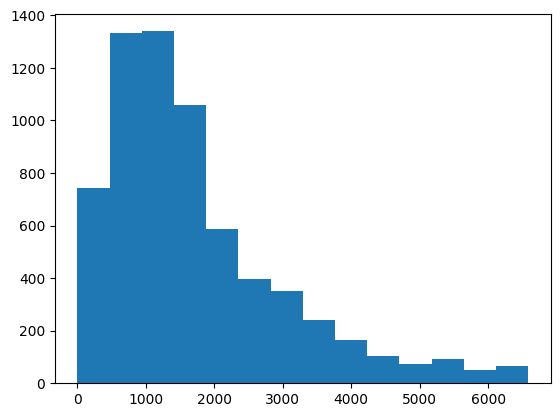

In [59]:
#k é o número de classes
#h é o histograma

time_in_days = dados_filtrados['time']

a = 1 + 3.3*m.log10(len(time_in_days))
k = round(a)
h = (max(time_in_days) - min(time_in_days))/k

print(a)
print(k)
print(h)

plt.hist(time_in_days, bins=k)
plt.show

In [60]:
dados_filtrados['chegada'] = (dados_filtrados['date'] - dados_filtrados['date'].min()).dt.days
display(dados_filtrados)

/tmp/ipykernel_96771/1863782112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados['chegada'] = (dados_filtrados['date'] - dados_filtrados['date'].min()).dt.days


,date,age_at_list_registration,number_prior_transplant,patient_still_on_list,death,Transplant,removed_list,time,Id,final_date,chegada
19779,2000-01-03,52,0,Não,Não,Sim,Não,1479.0,19779,2004-01-21,0
1333,2000-01-04,51,1,Não,Não,Não,Sim,1833.0,1333,2005-01-10,1
15146,2000-01-04,44,0,Não,Sim,Óbito Lista,Não,775.0,15146,2002-02-17,1
24674,2000-01-05,53,0,Não,Sim,Óbito Lista,Não,1888.0,24674,2005-03-07,2
7886,2000-01-06,55,0,Não,Sim,Óbito Lista,Não,6434.0,7886,2017-08-18,3
...,...,...,...,...,...,...,...,...,...,...,...
23615,2003-12-31,62,0,Não,Sim,Óbito Lista,Não,1771.0,23615,2008-11-05,1458
43137,2003-12-31,45,0,Não,Sim,Sim,Não,1628.0,43137,2008-06-15,1458
46436,2003-12-31,35,0,Não,Sim,Óbito Lista,Não,3826.0,46436,2014-06-22,1458
7873,2003-12-31,47,0,Não,Sim,Óbito Lista,Não,2308.0,7873,2010-04-26,1458


In [61]:
def fila(env, recurso, paciente, saida, chegada, prioridade):
    yield env.timeout(chegada)
    if saida != 0:
        print(paciente, 'saiu da fila em', saida)
    else:
        with recurso.request(priority=prioridade) as req:
            yield req
            print(paciente, 'atendida em', env.now)
            yield env.timeout(5)
            print(paciente, 'saiu do atendimento em', env.now)

env = simpy.Environment()
recurso = simpy.PriorityResource(env, capacity=1)

env.process(fila(env, recurso, 'Maria', 0, 0, 0))
env.process(fila(env, recurso, 'Paula', 2, 2, 1))
env.process(fila(env, recurso, 'Paulo', 6, 4, 1))
env.process(fila(env, recurso, 'Alana', 0, 0, 1))
env.process(fila(env, recurso, 'Sandra', 0, 0, 0))

env.run()

Maria atendida em 0
Paula saiu da fila em 2
Maria saiu do atendimento em 5
Sandra atendida em 5
Paulo saiu da fila em 6
Sandra saiu do atendimento em 10
Alana atendida em 10
Alana saiu do atendimento em 15


In [62]:
class Pessoa:
    def __init__(self, env, name, time_study, time_social):
        self.env = env
        self.name = name
        self.time_study = time_study
        self.time_social = time_social
        self.env.process(self.run())
 
    def run(self):
        while True:
            print(self.name +' Começou a estudar em', self.env.now)
            tempo_estudo = self.time_study
            yield self.env.timeout(tempo_estudo)
 
            print('Foi para as redes sociais em', self.env.now)
            tempo_redes_sociais = self.time_social
            yield self.env.timeout(tempo_redes_sociais)

env = simpy.Environment()
vini = Pessoa(env, 'Vini', 2, 5)
cius = Pessoa(env, 'Cius', 2, 5)
env.run(until=20)

Vini Começou a estudar em 0
Cius Começou a estudar em 0
Foi para as redes sociais em 2
Foi para as redes sociais em 2
Vini Começou a estudar em 7
Cius Começou a estudar em 7
Foi para as redes sociais em 9
Foi para as redes sociais em 9
Vini Começou a estudar em 14
Cius Começou a estudar em 14
Foi para as redes sociais em 16
Foi para as redes sociais em 16
